In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Modelos de Séries Temporais

# Modelos ARIMA

Exemplo da AULA - SÉRIES TEMPORAIS - Prof. Dr. Fabiano Guasti Lima <BR>
AULA MINISTRADA EM R E TRADUZIDA PARA PYTHON COMO FORMA DE APRENDIZADO.

Conjunto de observações ordenadas no tempo.

A série deve conter dados identados ao longo do tempo, ou seja, não deve haver furos ao longo do tempo. <br> 
Deve ser preenchidos com técnicas adequadas para cada caso.

## Definindo os Valores de p, d e q

- p: ordem da parte autorregressiva: PACF (função de autocorrelação parcial)
- d: grau de diferenciação: teste de estacionariedade
- q: ordem da média móvel: ACF (função de autocorrelação)

## Escolha dos Modelos

- ***Critério de AIC***: (Menor Melhor) Estima a quantidade relativa de informações perdiadas por determinado modelo.<br> Quanto menos informações um modelo perde, maior a qualidade desse modelo e menor a pontuação AIC.


- ***Critério de BIC***: (Menor Melhor) Critério de Informação Bayesiano


## Passo-a-passo

- 1o: Verificar se a série é estacionária ou não através do teste Dickey-Fuller
- 2o: Entender se existe sazonalidade;
- 3o: Verificar a Autocorrelação e Autocorrelação Parcial;
- 4o: Pode-se aplicar o modelo Auto-Arima;
- 5o: Verificar se os erros possuem distribuição normal e se não são autocorrelacionados;
- 6o: Avaliar se existe heterocedasticidade nos resíduos;

# Base COVID

Fonte: https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv

In [92]:
covid = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')
covid

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30837,311,2023-03-18,Brazil,SC,TOTAL,0,22703,0,1986447,22703,...,2568392.0,35847.42493,6308275.0,88.04552,5862014.0,81.81699,277356.0,3.87110,4166331.0,58.15009
30838,311,2023-03-18,Brazil,SE,TOTAL,0,6502,0,359692,6502,...,604183.0,26283.72782,2023048.0,88.00851,1860868.0,80.95320,43065.0,1.87345,1376006.0,59.86029
30839,311,2023-03-18,Brazil,SP,TOTAL,0,179039,0,6469442,179039,...,19501783.0,42469.91918,43381275.0,94.47337,40857206.0,88.97659,1286285.0,2.80120,29057424.0,63.27967
30840,311,2023-03-18,Brazil,TO,TOTAL,0,4232,0,365538,4232,...,903975.0,57473.10960,1183632.0,75.25320,1029319.0,65.44226,56219.0,3.57430,595805.0,37.88021


In [98]:
#Removendo a linha TOTAL 
covid = covid[covid['state'] != 'TOTAL']

In [99]:
# Sumarizando
var = ['newDeaths', 'newCases'] 
covid_gb1 = covid.groupby(['date'], as_index=False)[var].sum()

In [100]:
covid_gb1 = covid_gb1.sort_values(['date'])
covid_gb1

,date,newDeaths,newCases
0,2020-02-25,0,1
1,2020-02-26,0,0
2,2020-02-27,0,0
3,2020-02-28,0,1
4,2020-02-29,0,0
...,...,...,...
1113,2023-03-14,0,0
1114,2023-03-15,0,0
1115,2023-03-16,0,0
1116,2023-03-17,0,0


In [101]:
# Formatando a Data
covid_gb1['date'] = pd.to_datetime(covid_gb1['date'])
covid_gb1 = covid_gb1.set_index('date')

## Gráficos

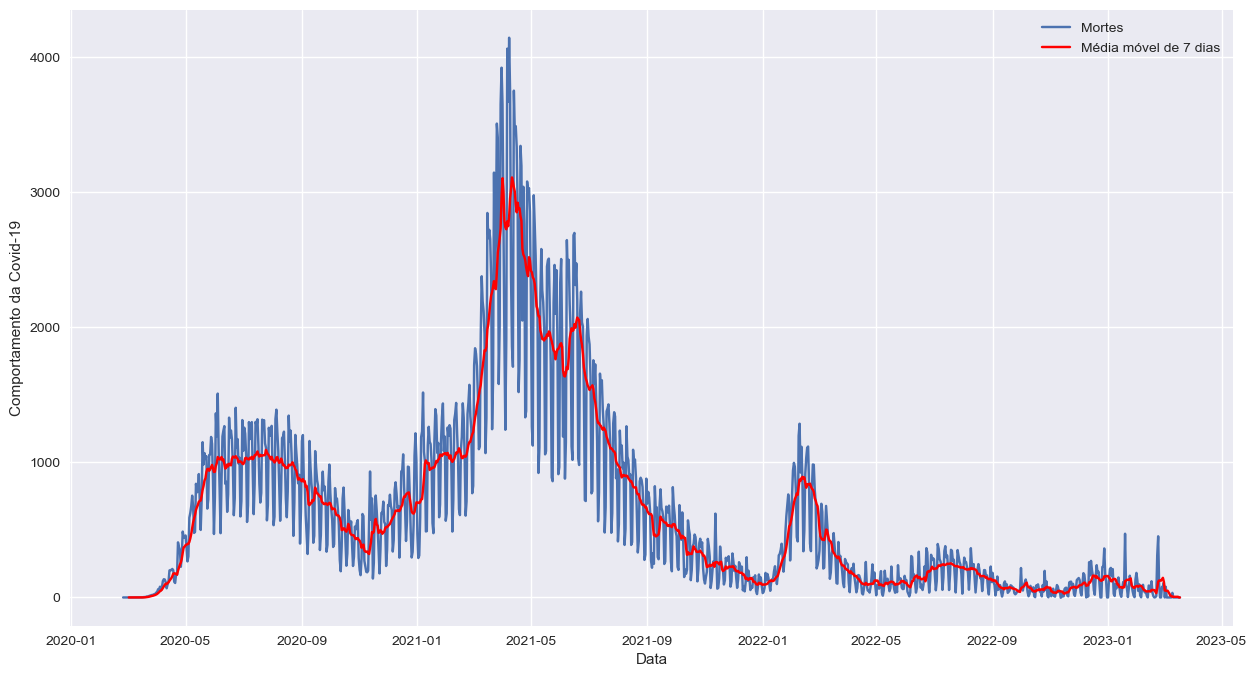

In [103]:
# Calcula a média móvel de 7 dias
media_movel = covid_gb1.newDeaths.rolling(window=7).mean()

#Plotando o Gráfico
plt.style.use('seaborn')
plt.figure(figsize=(15,8))
plt.plot(covid_gb1.newDeaths, label='Mortes')
plt.plot(media_movel, label='Média móvel de 7 dias', color='red')
plt.xlabel('Data')
plt.ylabel('Comportamento da Covid-19')
plt.legend()
plt.xticks(rotation=0)
plt.show()

### Gráfico por Estado

In [122]:
# Agrupa a base por data e estado
covid_gb2 = covid.groupby(['date','state'], as_index=False)[var].sum()
# Formata a data
covid_gb2['date'] = pd.to_datetime(covid_gb2['date']) 

<Figure size 1500x1000 with 0 Axes>

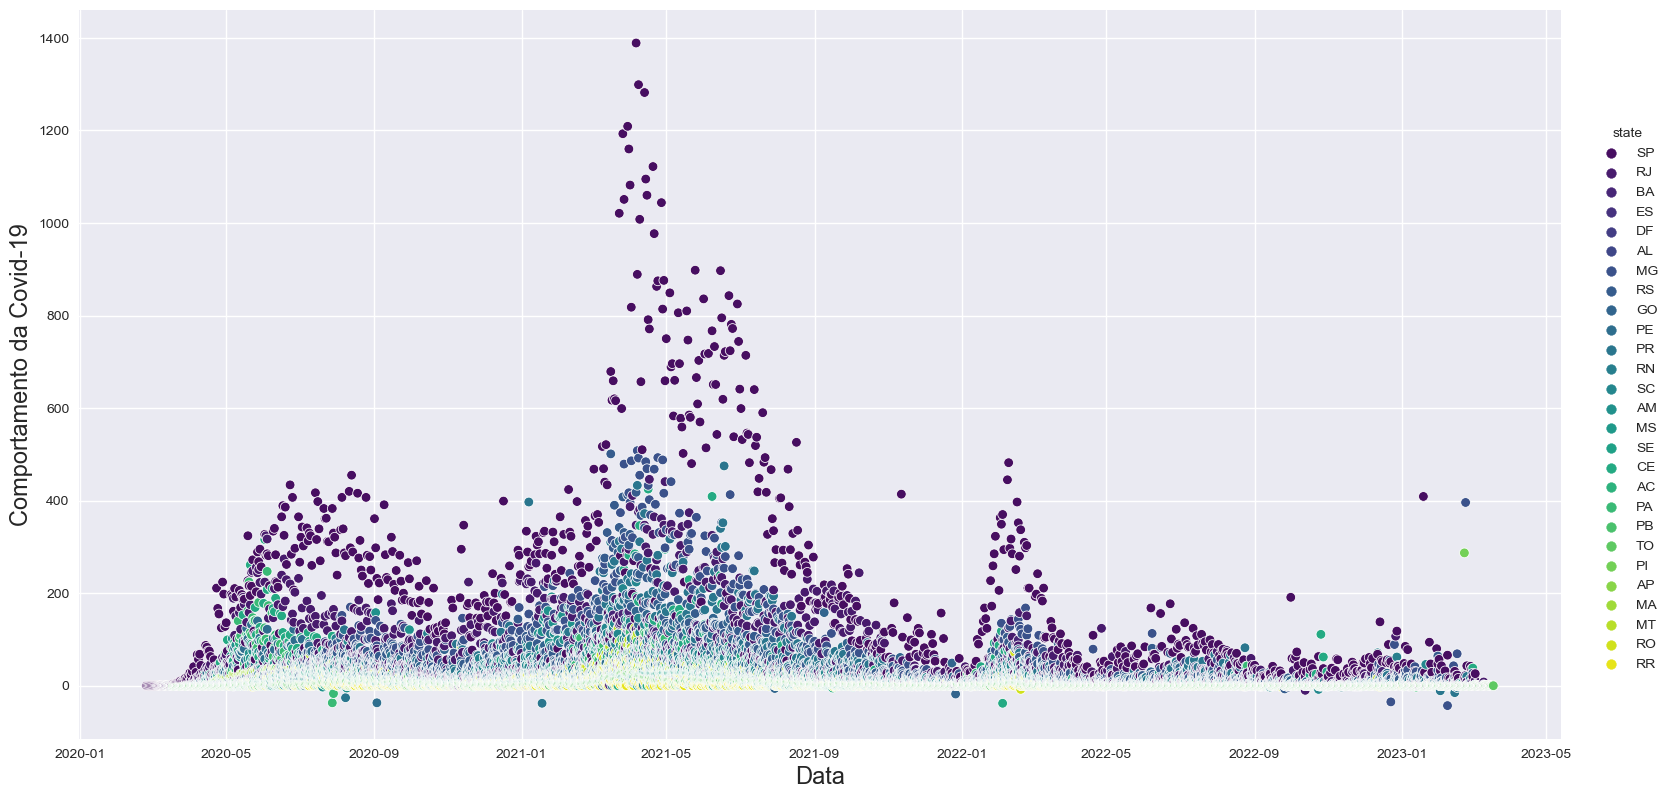

In [123]:
# Calcula a média móvel de 7 dias
media_movel = covid_gb2.newDeaths.rolling(window=7).mean()

plt.figure(figsize=(15,10))

sns.pairplot(x_vars='date', y_vars='newDeaths', data=covid_gb2 , hue='state', height=8,
             aspect=2, palette='viridis')
plt.xlabel('Data', fontsize=17)
plt.ylabel('Comportamento da Covid-19', fontsize=17)
plt.show()

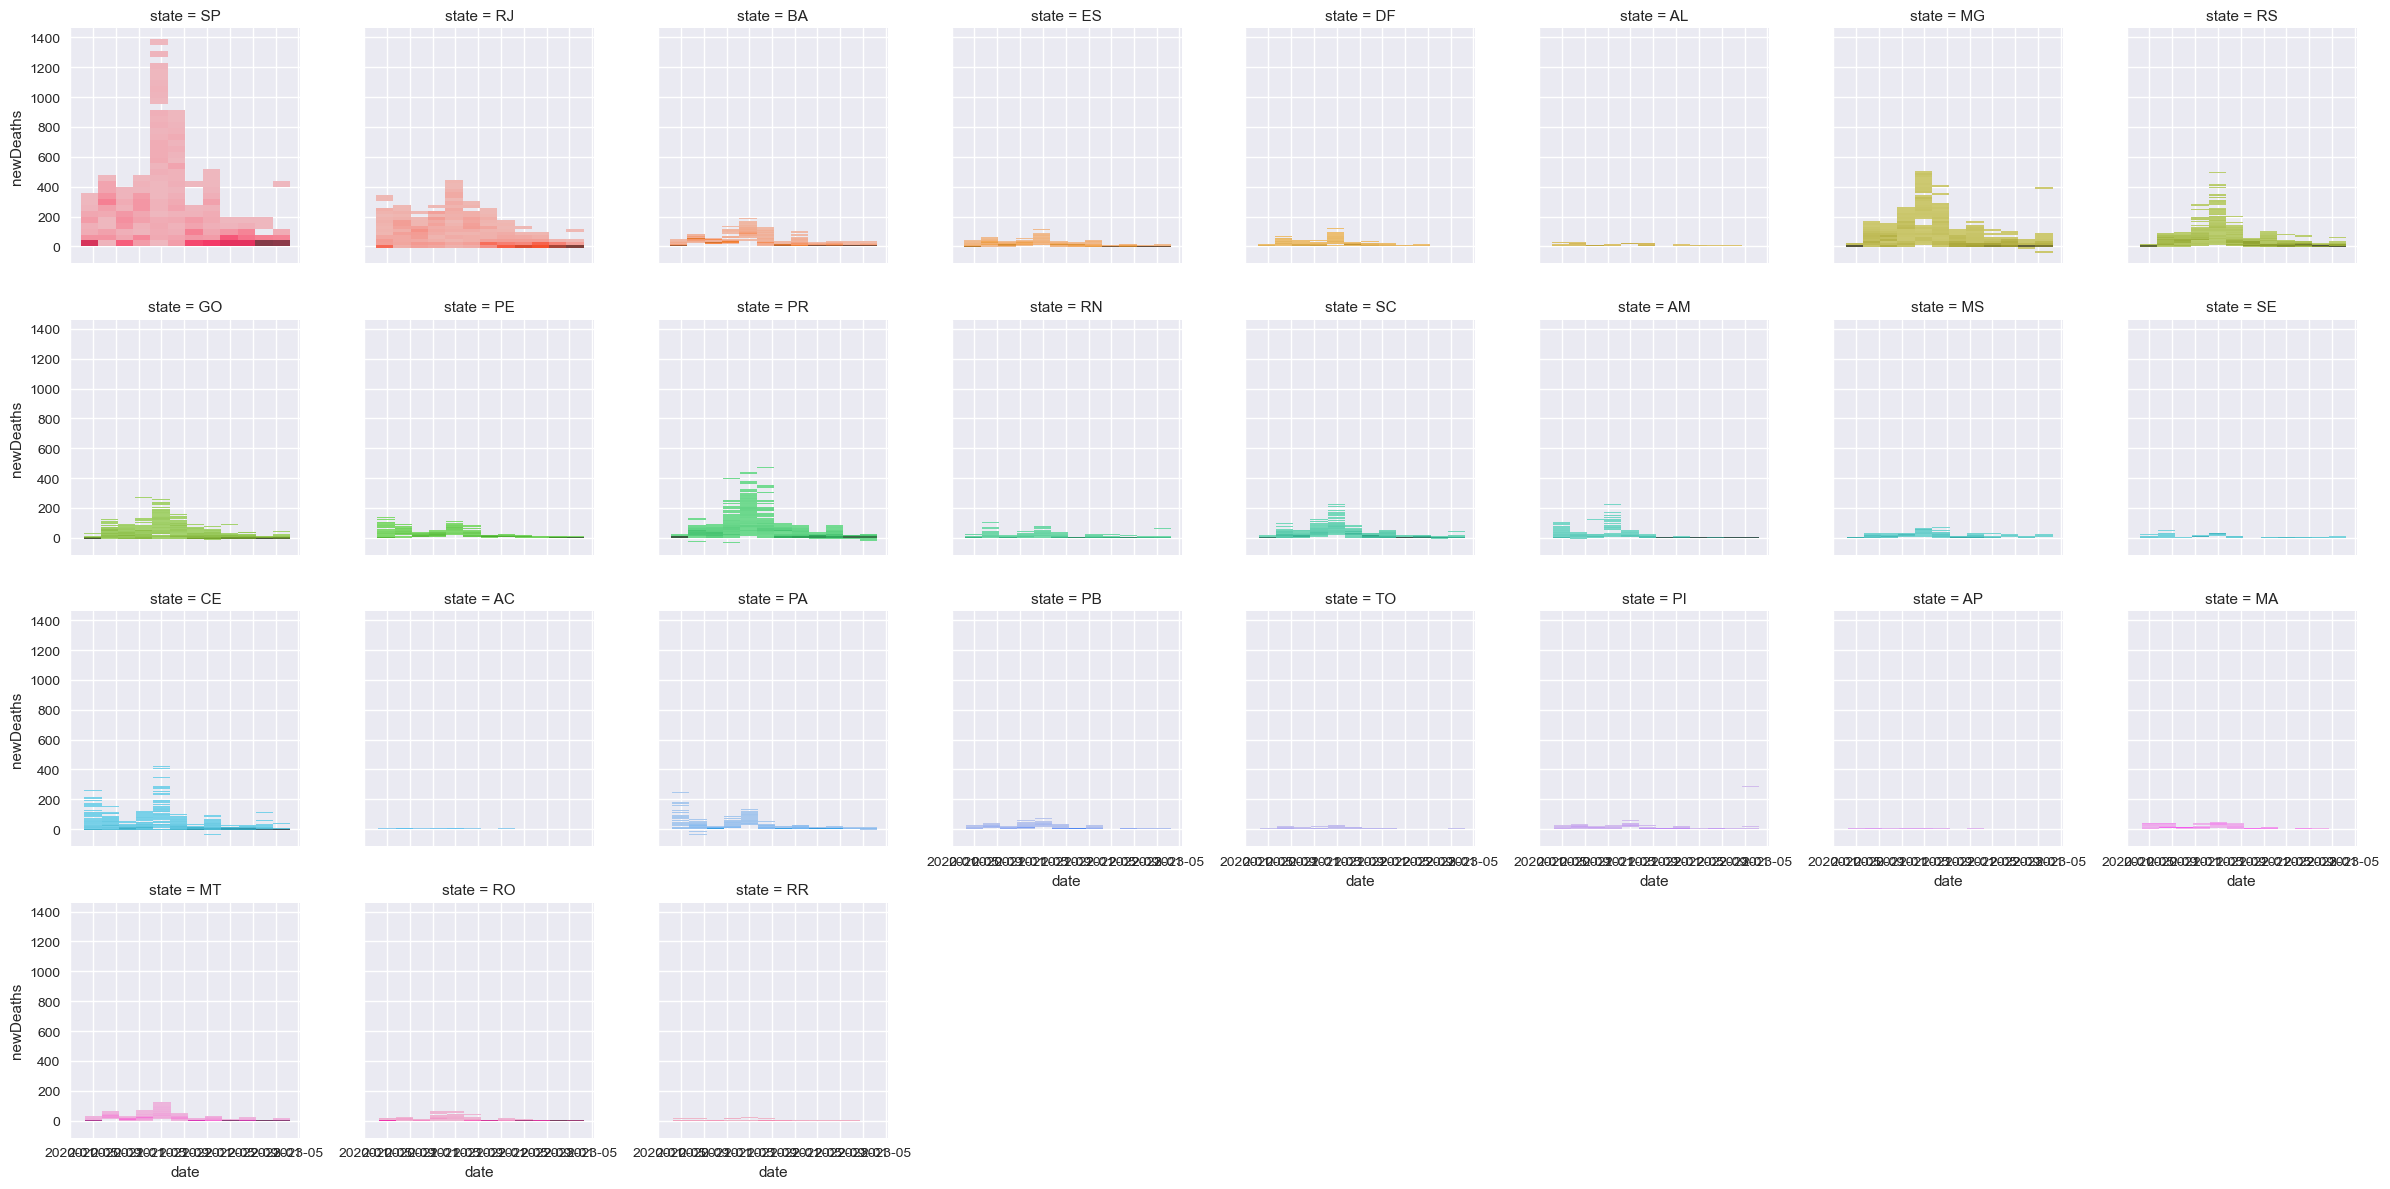

In [127]:
g = sns.FacetGrid(covid_gb2, col='state', col_wrap=8, hue='state')
g.map_dataframe(sns.histplot, y='newDeaths', x='date')
plt.show()

# Modelo ETS (Error, Trend, Seasonality)

Documentação: https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html

In [131]:
covid_rj = covid[covid['state'] == 'RJ']
covid_rj = covid_rj[['date','newDeaths']]
covid_rj['date'] = pd.to_datetime(covid_rj['date'])
covid_rj = covid_rj.set_index('date')
covid_rj

,newDeaths
date,
2020-03-05,0
2020-03-06,0
2020-03-07,0
2020-03-08,0
2020-03-09,0
...,...
2023-03-14,0
2023-03-15,0
2023-03-16,0


<AxesSubplot:xlabel='date'>

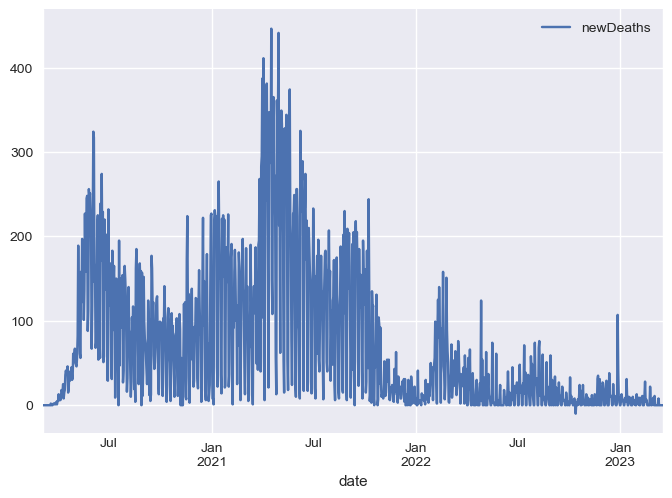

In [132]:
covid_rj.plot()

In [167]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

ets = ExponentialSmoothing(covid_rj, 
                           #seasonal_periods=12, #Sazonalidade anual 
                           #trend='add', # Tendência Aditiva 
                           damped_trend=False,
                           seasonal='add').fit() # Sazonal Aditiva


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='date'>

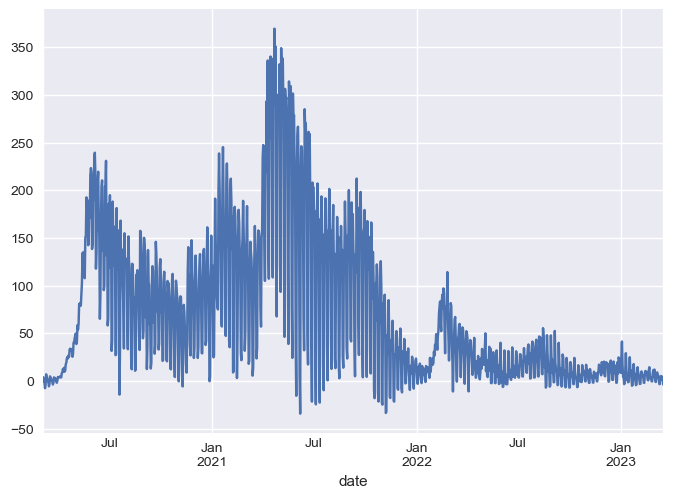

In [168]:
ets.fittedvalues.plot()

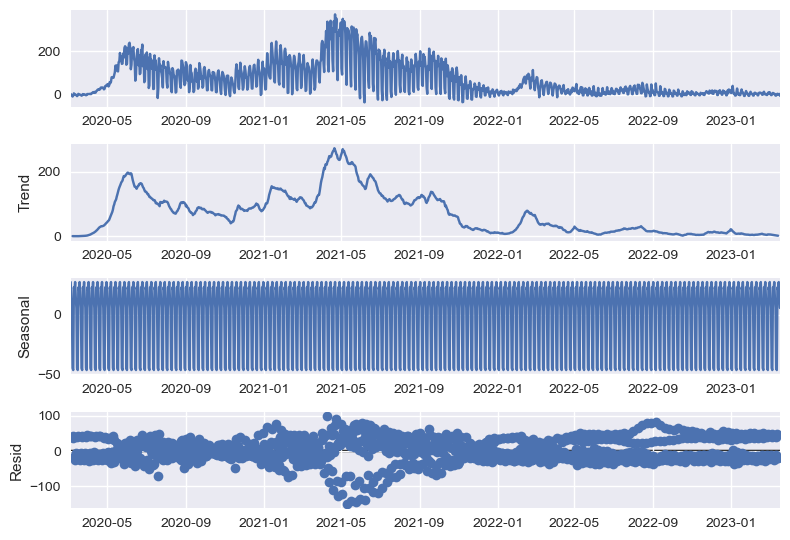

In [169]:
import statsmodels.api as sm

# decomposição da série temporal
decomposicao = sm.tsa.seasonal_decompose(ets.fittedvalues, model='add');

# exibindo os resultados
decomposicao.plot();

### Previsão do Modelo

In [170]:
prev_rj = ets.forecast(steps=14)

In [173]:
# Função calcula Intervalo de Confiânça

def ets_forecast(model, h=8):
    # Simulate predictions.
    n_steps_prediction =h 
    n_repetitions = 1000
    
    yhat = model.forecast(h)
    df_simul = model.simulate(
        nsimulations=n_steps_prediction,
        repetitions=n_repetitions,
        anchor='end',
    )
    
    # Calculate confidence intervals.
    upper_ci = df_simul.quantile(q=0.975, axis='columns')
    lower_ci = df_simul.quantile(q=0.025, axis='columns')
    pred_ci =  pd.DataFrame()
    pred_ci['upper'] = upper_ci
    pred_ci['lower'] = lower_ci
    plt.plot(yhat.index, yhat.values)
    plt.fill_between(yhat.index, (lower_ci), (upper_ci), color='blue', alpha=0.1)
    return pred_ci

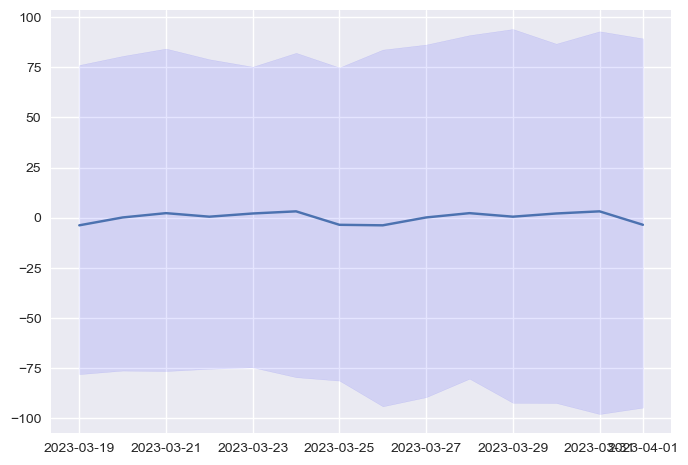

In [175]:
pred_ci = ets_forecast(ets, 14)

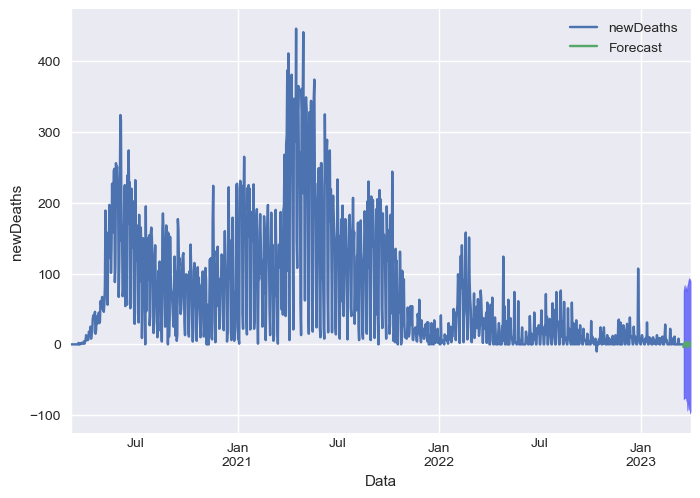

In [190]:
ax = covid_rj.plot(label='Treino')
prev_rj.plot(label= 'Forecast') # previsão do modelo

ax.fill_between(pred_ci.index, # datas
                pred_ci['lower'], # intervalo de confiança inferior
                pred_ci['upper'], # intervalo de confiança superior
                color='blue', alpha=.50)

plt.xlabel('Data')
plt.ylabel('newDeaths')
plt.legend()

# Modelo AUTO-ARIMA

Documentação: https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

Dicas: https://alkaline-ml.com/pmdarima/tips_and_tricks.html#period

In [188]:
from pmdarima.arima import auto_arima

arima_rj = auto_arima(covid_rj,
                        seasonal=True, m=7, #semanal
                        error_action='ignore', suppress_warnings=True, 
                        stepwise=False)

arima_rj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1109
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -5634.783
Date:                           Tue, 23 May 2023   AIC                          11281.565
Time:                                   21:28:22   BIC                          11311.627
Sample:                               03-05-2020   HQIC                         11292.934
                                    - 03-18-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0028      0.055      0.051      0.959      -0.105       0.111
ar.L1          0.0728      0.022      3.275      0.001       0.029       0.116
ma.L1         -0.8546      0.012    -72.542      0.000      -0.878      -0.832
ar.S.L7        0.9616      0.009    109.687      0.000       0.944       0.979
ma.S.L7       -0.6911      0.021    -33.285      0.000      -0.732      -0.650
sigma2      1518.8835     39.439     38.512      0.000    1441.584    1596.183
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               693.58
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.14   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [191]:
prev_arima = arima_rj.predict(n_periods=14, 
                                   return_conf_int=True, 
                                   alpha = 0.05) #Intervalo de confiança de 5% (1-alpha)

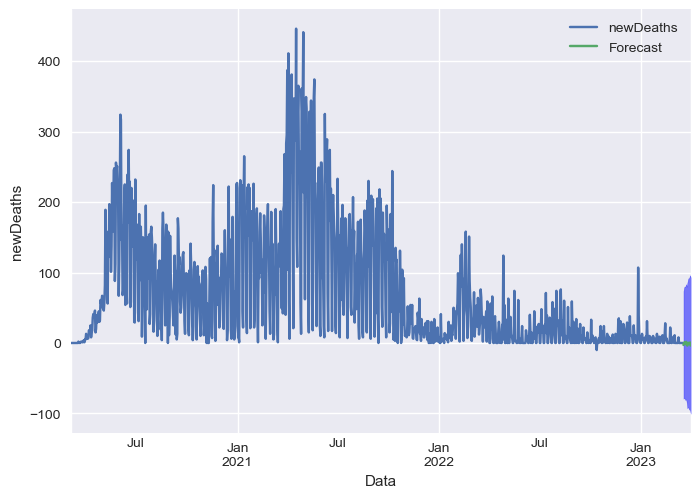

In [192]:
#ax = chpras_fat.chpras_fat_primo.plot(label='observado', figsize=(20,15))

ax = covid_rj.plot(label='Treino')
prev_arima[0].plot(label= 'Forecast') # previsão do modelo

ax.fill_between(prev_arima[0].index, # datas
                prev_arima[1][:,0], # intervalo de confiança inferior
                prev_arima[1][:,1], # intervalo de confiança superior
                color='blue', alpha=.50)

plt.xlabel('Data')
plt.ylabel('newDeaths')
plt.legend()